### 네이버 뉴스기사 크롤링
각 분야별 페이지에서 최상단에 위치한 주제의 기사들을 크롤링하되,<br> 해당 주제에 대한 ‘더 많은 기사’들의 텍스트 데이터까지 크롤링

In [6]:
from collections import Counter
from string import punctuation
from konlpy.tag import Okt 
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
okt = Okt()
warnings.filterwarnings('ignore')

In [ ]:
def crawling(soup) :
    # 기사에서 내용을 추출하고 반환 
    div = soup.find('div', class_="_article_body_contents")
    
    result = div.get_text().replace('\n', '').replace('// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}', '').replace('\t', '')
    
    return result
    
    
def get_href(soup, custom_header) :
    result = []
    
    cluster_head = soup.find("h2", class_="cluster_head_topic")
    href = cluster_head.find("a")["href"]
    
    url = "https://news.naver.com" + href
    req = requests.get(url, headers=custom_header)
    new_soup = BeautifulSoup(req.text, "html.parser")
    
    main_content = new_soup.find("div", id="main_content")
    
    for ul in main_content.find_all("ul") :
        for a in ul.find_all("a") :
            result.append(a["href"])
    
    return result


def get_request(section, custom_header) :
    url = "https://news.naver.com/main/main.nhn"
    section_dict = { "정치" : 100,
                     "경제" : 101,
                     "사회" : 102,
                     "생활" : 103,
                     "세계" : 104,
                     "과학" : 105 }
    return requests.get(url, params={"sid1":section_dict[section]}, headers=custom_header)

# 추가된 코드 
def get_href_politics(soup, custom_header) :
    result = []
    
    cluster_head = soup.find("div", class_="cluster_foot_inner")
    href = cluster_head.find("a")["href"]
    
    url = "https://news.naver.com" + href
    req = requests.get(url, headers=custom_header)
    new_soup = BeautifulSoup(req.text, "html.parser")
    
    main_content = new_soup.find("div", id="main_content")
    
    for ul in main_content.find_all("ul") :
        for a in ul.find_all("a") :
            result.append(a["href"])
    
    return result
    
    
def main() :
    custom_header = {'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36'}
    list_href = []
    result = []
    
    # 섹션 입력 
    section = input('"정치", "경제", "사회", "생활", "세계", "과학" 중 하나를 입력하세요.\n  > ')
    
    req = get_request(section, custom_header)
    soup = BeautifulSoup(req.text, "html.parser")
    
    # 추가된 코드 
    if section != "정치":
        list_href = get_href(soup, custom_header)
    else:
        list_href = get_href_politics(soup, custom_header)
    
    for href in list_href :
        href_req = requests.get(href, headers=custom_header)
        href_soup = BeautifulSoup(href_req.text, "html.parser")
        result.append(crawling(href_soup))
    
    print(result)


if __name__ == "__main__" :
    main()  


### news section_headline 별 기사 내용

In [3]:
def crawling(soup) :
    # 기사에서 내용을 추출하고 반환 
    div = soup.find('div', class_="_article_body_contents")
    
    result = div.get_text().replace('\n', '').replace('// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}', '').replace('\t', '')
    
    return result
    
    
def get_href(soup, custom_header) :
    result = []
    
    cluster_head = soup.find("h2", class_="cluster_head_topic")
    href = cluster_head.find("a")["href"]
    
    url = "https://news.naver.com" + href
    req = requests.get(url, headers=custom_header)
    new_soup = BeautifulSoup(req.text, "html.parser")
    
    main_content = new_soup.find("div", id="main_content")
    
    for ul in main_content.find_all("ul") :
        for a in ul.find_all("a") :
            result.append(a["href"])
    
    return result


def get_request(section, custom_header) :
    url = "https://news.naver.com/main/main.nhn"
    section_dict = { "정치" : 100,
                     "경제" : 101,
                     "사회" : 102,
                     "생활" : 103,
                     "세계" : 104,
                     "과학" : 105 }
    return requests.get(url, params={"sid1":section_dict[section]}, headers=custom_header)

# 추가된 코드 
def get_href_politics(soup, custom_header) :
    result = []
    
    cluster_head = soup.find("div", class_="cluster_foot_inner")
    href = cluster_head.find("a")["href"]
    
    url = "https://news.naver.com" + href
    req = requests.get(url, headers=custom_header)
    new_soup = BeautifulSoup(req.text, "html.parser")
    
    main_content = new_soup.find("div", id="main_content")
    
    for ul in main_content.find_all("ul") :
        for a in ul.find_all("a") :
            result.append(a["href"])
    
    return result
    
    
def main() :
    custom_header = {'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36'}
    list_href = []
    result = []
    
    # 섹션 입력 
    section = input('"정치", "경제", "사회", "생활", "세계", "과학" 중 하나를 입력하세요.\n  > ')
    
    req = get_request(section, custom_header)
    soup = BeautifulSoup(req.text, "html.parser")
    
    # 추가된 코드 
    if section != "정치":
        list_href = get_href(soup, custom_header)
    else:
        list_href = get_href_politics(soup, custom_header)
    
    for href in list_href :
        href_req = requests.get(href, headers=custom_header)
        href_soup = BeautifulSoup(href_req.text, "html.parser")
        result.append(crawling(href_soup))
    
    text = " ".join(result)
    return text
    #create_word_cloud(text)

### 단어 빈도수

In [7]:
def count_word_freq(data) :
    _data = data.lower()
    
    for p in punctuation :
        _data = _data.replace(p, "")
    
    # 명사 추출
    _data = okt.nouns(_data)
    
    counter = Counter(_data)
    
    return counter

### 워드클라우드 생성

"정치", "경제", "사회", "생활", "세계", "과학" 중 하나를 입력하세요.
  > 사회


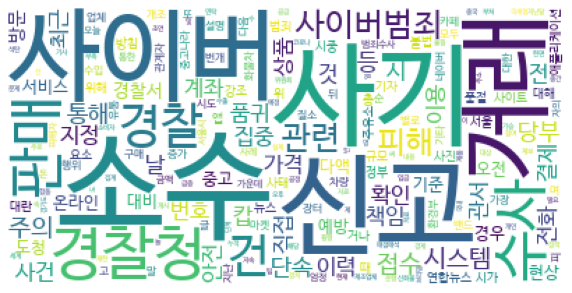

In [9]:
def create_word_cloud(data) :
    counter = count_word_freq(data)
    
    cloud = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white')
    cloud.fit_words(counter)
    cloud.to_file('cloud.png')
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()
    
if __name__ == "__main__" :
    create_word_cloud(main())